In [1]:
import qiskit
from qiskit.quantum_info import Operator, Statevector
from numpy import sqrt

In [2]:
X = Operator([[0,1], [1,0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1,0], [0,-1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1,0], [0, 1.0j]])
T = Operator([[1,0], [0, (1+1.0j) / sqrt(2)]])

v = Statevector([1,0])

In [3]:
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

display(v.draw("text"))
display(v.draw("latex"))

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

<IPython.core.display.Latex object>

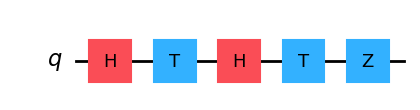

In [4]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

display(circuit.draw(output='mpl'))

In [6]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

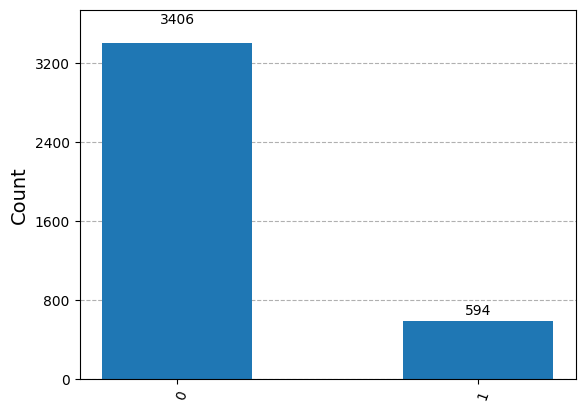

In [7]:
from qiskit.visualization import plot_histogram
statistics = v.sample_counts(4000)
plot_histogram(statistics)